In [1]:
from pathlib import Path
import sys

PROJECT_ROOT = Path().resolve().parents[0]
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

print("PROJECT_ROOT:", PROJECT_ROOT)


PROJECT_ROOT: C:\Users\LAB1\Desktop\dev\personal_project\systematic-trading-framework


In [2]:
import matplotlib.pyplot as plt

from src.data.loaders import load_ohlcv
from src.data.validation import validate_ohlcv

from src.features import (
    add_close_returns,
    add_volatility_features,
)

from src.features.technical.trend import (
    add_trend_features,
    add_trend_regime_features,
)

from src.features.technical.momentum import (
    add_momentum_features,
)

from src.features.technical.oscillators import (
    add_oscillator_features,
)


In [4]:
df = load_ohlcv("SPY", start="2020-01-01", interval="1d")
validate_ohlcv(df)

df = add_close_returns(df, log=True)

df = add_volatility_features(
    df,
    returns_col="close_logret",
    rolling_windows=(20,),
    ewma_spans=(20,),
)

df = add_trend_features(
    df,
    price_col="close",
    sma_windows=(20, 50),
    ema_spans=(20,),
)

df = add_trend_regime_features(
    df,
    price_col="close",
    base_sma_for_sign=50,
    short_sma=20,
    long_sma=50,
)

df = add_momentum_features(
    df,
    price_col="close",
    returns_col="close_logret",
    vol_col="vol_rolling_20",
    windows=(20,),
)

df.tail()


Price,open,high,low,close,volume,close_logret,vol_rolling_20,vol_ewma_20,close_sma_20,close_over_sma_20,close_sma_50,close_over_sma_50,close_ema_20,close_over_ema_20,close_trend_regime_sma_50,close_trend_state_sma_20_50,close_mom_20,close_logret_mom_20,close_logret_norm_mom_20
Date,,,,,,,,,,,,,,,,,,,
2026-01-23,688.150024,690.960022,687.159973,689.229980,63059600,0.000363,0.105486,0.122262,688.885495,0.000500,681.932201,0.010702,687.651863,0.002295,1.0,1.0,0.001846,0.001844,0.017484
2026-01-26,690.489990,694.130005,689.919983,692.729980,60473800,0.005065,0.106295,0.118555,689.002994,0.005409,682.126801,0.015544,688.135493,0.006677,1.0,1.0,0.003404,0.003398,0.031969
2026-01-27,694.179993,696.530029,693.570007,695.489990,55506100,0.003976,0.107139,0.113849,689.261993,0.009036,682.369000,0.019229,688.835922,0.009660,1.0,1.0,0.007504,0.007476,0.069777
2026-01-28,697.049988,697.840027,693.940002,695.419983,61172200,-0.000101,0.106148,0.108423,689.640494,0.008380,682.836600,0.018428,689.462975,0.008640,1.0,1.0,0.011005,0.010945,0.103112
2026-01-29,696.390015,697.059998,684.830017,694.039978,97338600,-0.001986,0.106352,0.104056,689.991992,0.005867,683.278800,0.015749,689.898880,0.006002,1.0,1.0,0.010233,0.010181,0.095727


In [5]:
df = add_oscillator_features(
    df,
    price_col="close",
    high_col="high",
    low_col="low",
    rsi_windows=(14,),
    stoch_windows=(14,),
    stoch_smooth=3,
)

df[
    [
        "close",
        "close_rsi_14",
        "close_stoch_k_14",
        "close_stoch_d_14",
    ]
].tail()


Price,close,close_rsi_14,close_stoch_k_14,close_stoch_d_14
Date,,,,
2026-01-23,689.229980,52.790843,64.856355,57.889224
2026-01-26,692.729980,56.120526,82.786665,70.406213
2026-01-27,695.489990,58.600241,94.789389,80.810803
2026-01-28,695.419983,58.509921,88.622277,88.732777
2026-01-29,694.039978,56.656146,82.134249,88.515305


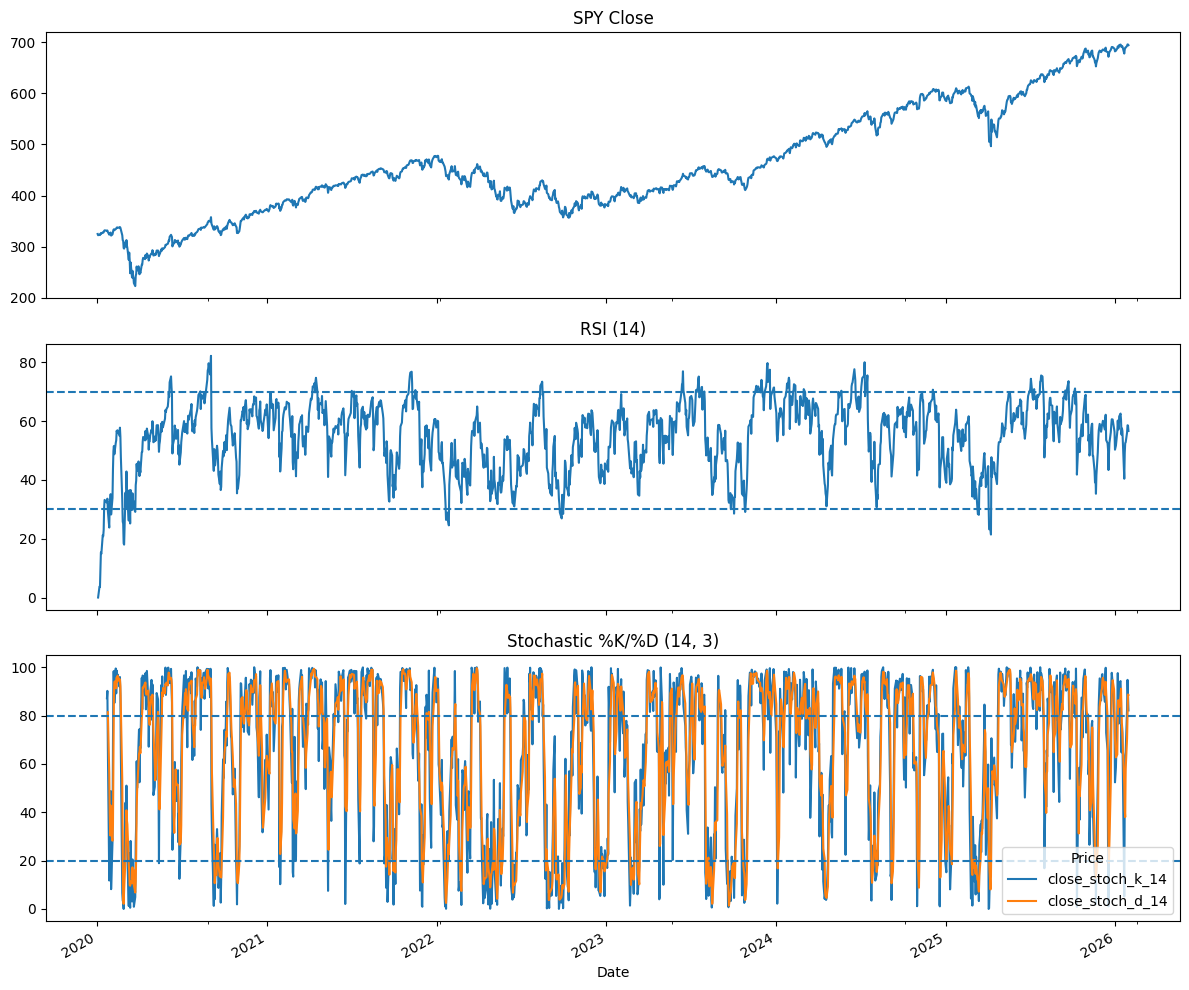

In [6]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

df["close"].plot(ax=axes[0])
axes[0].set_title("SPY Close")

df["close_rsi_14"].plot(ax=axes[1])
axes[1].axhline(70, linestyle="--")
axes[1].axhline(30, linestyle="--")
axes[1].set_title("RSI (14)")

df[["close_stoch_k_14", "close_stoch_d_14"]].plot(ax=axes[2])
axes[2].axhline(80, linestyle="--")
axes[2].axhline(20, linestyle="--")
axes[2].set_title("Stochastic %K/%D (14, 3)")

plt.tight_layout()


In [7]:
df[
    [
        "close_rsi_14",
        "close_stoch_k_14", 
        "close_stoch_d_14",
    ]
].describe()


Price,close_rsi_14,close_stoch_k_14,close_stoch_d_14
count,1526.000000,1514.000000,1512.000000
mean,54.963235,65.221253,65.193427
std,11.795080,30.892076,28.595732
min,0.000000,0.000000,1.376705
25%,47.038243,42.259228,43.515805
50%,57.035275,74.888976,75.647666
75%,63.721696,92.261233,90.105849
max,82.219298,100.000000,99.660067


In [8]:
bull = df[df["close_trend_state_sma_20_50"] == 1]
bear = df[df["close_trend_state_sma_20_50"] == -1]

bull_rsi = bull["close_rsi_14"].describe()
bear_rsi = bear["close_rsi_14"].describe()

bull_stoch = bull["close_stoch_k_14"].describe()
bear_stoch = bear["close_stoch_k_14"].describe()

bull_rsi, bear_rsi, bull_stoch, bear_stoch


(count    1061.000000
 mean       58.524029
 std         9.865523
 min        26.418149
 25%        52.824518
 50%        59.896525
 75%        65.773664
 max        82.219298
 Name: close_rsi_14, dtype: float64,
 count    417.000000
 mean      48.403491
 std       10.326011
 min       21.423318
 25%       40.928744
 50%       48.909537
 75%       56.758188
 max       69.930988
 Name: close_rsi_14, dtype: float64,
 count    1061.000000
 mean       67.709641
 std        29.855167
 min         0.071375
 25%        49.580885
 50%        78.635212
 75%        92.703886
 max       100.000000
 Name: close_stoch_k_14, dtype: float64,
 count    417.000000
 mean      60.134677
 std       31.996133
 min        0.000000
 25%       32.201489
 50%       63.939928
 75%       90.372586
 max      100.000000
 Name: close_stoch_k_14, dtype: float64)

### RSI (Relative Strength Index)

Για τιμές κλεισίματος \( P_t \) ορίζουμε τις ημερήσιες διαφορές:

$$
\Delta P_t = P_t - P_{t-1}
$$

Τα "gains" και "losses":

$$
G_t = \max(\Delta P_t, 0), \quad
L_t = \max(-\Delta P_t, 0)
$$

Ορίζουμε τους "μέσους" όρους (π.χ. με EWMA τύπου Wilder):

$$
\text{AvgGain}_t = \text{EWMA}_t(G_t), \quad
\text{AvgLoss}_t = \text{EWMA}_t(L_t)
$$

Το RS και το RSI:

$$
\text{RS}_t = \frac{\text{AvgGain}_t}{\text{AvgLoss}_t}, \quad
\text{RSI}_t = 100 - \frac{100}{1 + \text{RS}_t}
$$

Τυπικά, RSI \(\in [0, 100]\), με:
- υψηλές τιμές → overbought / ισχυρή ανοδική κίνηση
- χαμηλές τιμές → oversold / ισχυρή πτωτική κίνηση.

---

### Stochastic Oscillator

Για high/low/close σε παράθυρο \( n \):

$$
\text{LowestLow}_t = \min_{0 \le i < n} L_{t-i}, \quad
\text{HighestHigh}_t = \max_{0 \le i < n} H_{t-i}
$$

Ορίζουμε:

$$
\%K_t =
100 \cdot
\frac{C_t - \text{LowestLow}_t}{\text{HighestHigh}_t - \text{LowestLow}_t}
$$

και

$$
\%D_t = \text{SMA}_m(\%K_t)
$$

τυπικά με \( n = 14 \), \( m = 3 \).

Τιμές κοντά στο 100 → close κοντά στο πρόσφατο high (πιθανό overbought),  
τιμές κοντά στο 0 → close κοντά στο πρόσφατο low (oversold).
